### Import Packages

In [ ]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
projectdir = Path(os.getcwd())
datadir = projectdir.parent / 'Dataset'
data = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')

In [ ]:
data.shape

(165464, 14)

In [ ]:
data.head(3)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165464 entries, 0 to 165463
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165464 non-null  int64 
 1   month                    165464 non-null  int64 
 2   day                      165464 non-null  int64 
 3   order                    165464 non-null  int64 
 4   country                  165464 non-null  int64 
 5   session ID               165464 non-null  int64 
 6   page 1 (main category)   165464 non-null  int64 
 7   page 2 (clothing model)  165464 non-null  object
 8   colour                   165464 non-null  int64 
 9   location                 165464 non-null  int64 
 10  model photography        165464 non-null  int64 
 11  price                    165464 non-null  int64 
 12  price 2                  165464 non-null  int64 
 13  page                     165464 non-null  int64 
dtypes: int64(13), object

#### Rename columns

In [ ]:
data.rename(columns={
    'session ID': 'session-id',
    'price 2': 'price-higher-than-category',
    'page 1 (main category)': 'category',
    'page 2 (clothing model)': 'product-code',
    'model photography': 'model-photography',
    'page': 'page-no'
}, inplace=True)

#### Data Encoding

In [ ]:
data['price-higher-than-category'] = data['price-higher-than-category'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
class LabelEncoder:
    def __init__(self) -> None:
        self.str2idx = {}
        self.idx2str = {}

    def __str__(self) -> str:
        return f'Number of encoded strings: {len(self.str2idx)}'

    def __repr__(self) -> str:
        return self.__str__()

    def fit(self, col: np.array) -> None:
        c = 0
        for strItem in col:
            if strItem not in self.str2idx:
                self.str2idx[strItem] = c
                self.idx2str[c] = strItem
                c += 1

    def transform(self, col: np.array) -> np.array:
        return np.array([self.str2idx[ele] for ele in col])

    def inverse_transform(self, col: np.array) -> np.array:
        return np.array([self.idx2str[ele] for ele in col])

    def fit_transform(self, col: np.array) -> np.array:
        self.fit(col)
        return self.transform(col)

In [ ]:
product_encoder = LabelEncoder()
data['product-code-en'] = product_encoder.fit_transform(data['product-code'])

In [ ]:
def price_bucketing(price: int):
    if price in range(0, 26):
        return 'budget'
    elif price in range(26, 36):
        return 'value'
    elif price in range(35, 66):
        return 'average'
    elif price in range(66, 101):
        return 'premium'
    else:
        return None

data['price-category'] = data['price'].apply(lambda price: price_bucketing(price))

In [ ]:
price_category_encoder = LabelEncoder()
data['price-category_en'] = price_category_encoder.fit_transform(data['price-category'])

In [ ]:
data.drop(['price-category', 'product-code'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165464 entries, 0 to 165463
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   year                        165464 non-null  int64
 1   month                       165464 non-null  int64
 2   day                         165464 non-null  int64
 3   order                       165464 non-null  int64
 4   country                     165464 non-null  int64
 5   session-id                  165464 non-null  int64
 6   category                    165464 non-null  int64
 7   colour                      165464 non-null  int64
 8   location                    165464 non-null  int64
 9   model-photography           165464 non-null  int64
 10  price                       165464 non-null  int64
 11  price-higher-than-category  165464 non-null  int64
 12  page-no                     165464 non-null  int64
 13  product-code-en             165464 non-null 

#### Missing values

In [ ]:
data.isna().sum()

year                          0
month                         0
day                           0
order                         0
country                       0
session-id                    0
category                      0
colour                        0
location                      0
model-photography             0
price                         0
price-higher-than-category    0
page-no                       0
product-code-en               0
price-category_en             0
dtype: int64

Retrieving from S3 public dataset bucket

In [ ]:
comp_data = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')

In [ ]:
comp_data.head(10)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
5,2008,4,1,6,29,1,3,C56,6,1,2,57,1,4
6,2008,4,1,7,29,1,3,C57,5,1,2,33,2,4
7,2008,4,1,8,29,1,4,P67,9,5,1,38,1,4
8,2008,4,1,9,29,1,4,P82,6,4,2,48,1,5
9,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2


### Get Data

In [ ]:
!pip install calplot

### Import Packages

In [ ]:
import calplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
# data = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')

In [ ]:
data.head(4)

,year,month,day,order,country,session-id,category,colour,location,model-photography,price,price-higher-than-category,page-no,product-code-en,price-category_en
0,2008,4,1,1,29,1,1,1,5,1,28,0,1,0,0
1,2008,4,1,2,29,1,1,1,6,1,33,0,1,1,0
2,2008,4,1,3,29,1,2,10,2,1,52,1,1,2,1
3,2008,4,1,4,29,1,2,6,6,2,38,0,1,3,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165464 entries, 0 to 165463
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   year                        165464 non-null  int64
 1   month                       165464 non-null  int64
 2   day                         165464 non-null  int64
 3   order                       165464 non-null  int64
 4   country                     165464 non-null  int64
 5   session-id                  165464 non-null  int64
 6   category                    165464 non-null  int64
 7   colour                      165464 non-null  int64
 8   location                    165464 non-null  int64
 9   model-photography           165464 non-null  int64
 10  price                       165464 non-null  int64
 11  price-higher-than-category  165464 non-null  int64
 12  page-no                     165464 non-null  int64
 13  product-code-en             165464 non-null 

### Data Exploration & Visualisation

In [ ]:
classification_data = data.drop(['price'], axis=1)
regression_data = data.drop(['price-category_en'], axis=1)

#### Univariate Analysis

Checking out year ranges present in the data

In [ ]:
data['year'].value_counts()

2008    165464
Name: year, dtype: int64

The year attribute only has one value - `2008`. Hence does not give any unique information about the response variable. Thereby can be dropped!

Checking out unique session ids

In [ ]:
print(f'Unique Session IDs: {len(data["session-id"].unique())}')

Unique Session IDs: 24023


Session IDs are techincally unique IDs for each new user session that is generated. Hence this ID doesn't tell us anything about user's behaviour.

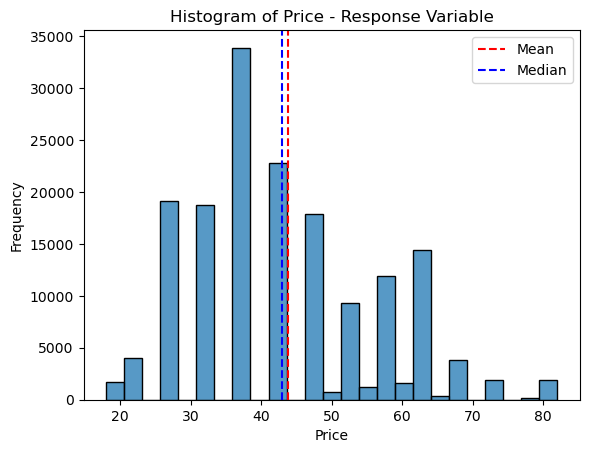

In [ ]:
sns.histplot(data['price'], bins=25)
plt.axvline(x=data['price'].mean(), label='Mean', color='red', linestyle='--')
plt.axvline(x=data['price'].median(), label='Median', color='blue', linestyle='--')
plt.title(f'Histogram of Price - Response Variable')
plt.xlabel(f'Price')
plt.ylabel(f'Frequency')
plt.legend()
plt.show()

Mean pricing is about 44 & Median is about 43

Checking months with highest & lowest orders

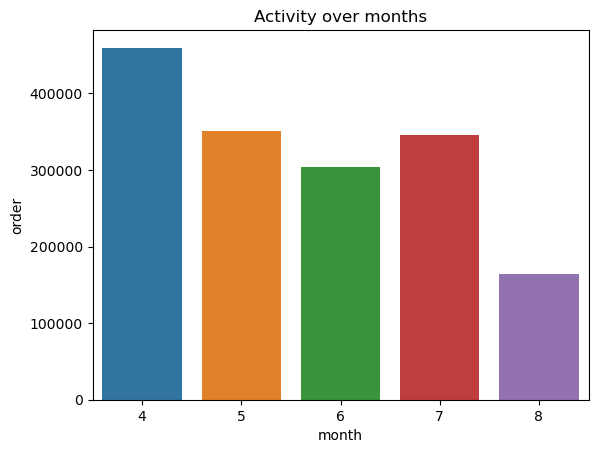

In [ ]:
monthly_activity = data.groupby(['month'])['order'].sum().reset_index()
sns.barplot(x=monthly_activity['month'], y=monthly_activity['order'])
plt.title(f'Activity over months')
plt.show()

Visualising calender heatmap to understand temporal changes in number of orders, throughout the year

In [ ]:
dates = data['day'].astype('str') + '/' + data['month'].astype('str') + '/' + data['year'].astype('str')
data['date'] = pd.to_datetime(dates, dayfirst=True)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


<Figure size 1000x1000 with 0 Axes>

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


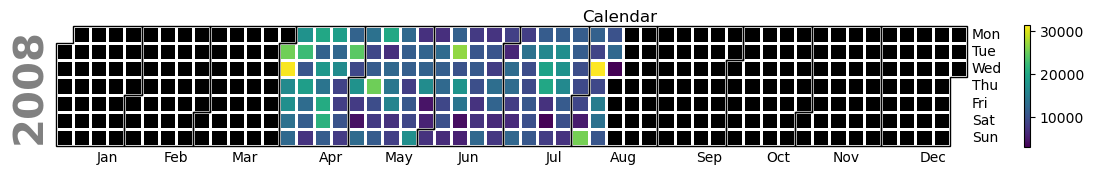

In [ ]:
values = data.groupby(['date'])['order'].sum()

plt.figure(figsize=(10,10))
calplot.calplot(values,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0}, fillcolor = 'black', edgecolor = 'black')
plt.show()

Clearly, the dates with lighter colors have highest number of orderes recieved. Rest seem to be recieve average number of orders. The dates with black or darker shades of green / blue have minimum number of orders. The following is observed:
- April has major number of orders (More lighter color cells)
- June has lowest amount of orders recieved
- May & July almost have equal amounts of orders recieved.
- Aug has one day with very high amounts of orderes recieved.

Finding the countries with most orders

In [ ]:
country_map = {
    1:'Australia', 2:'Austria', 3:'Belgium',
    4:'British Virgin Islands', 5:'Cayman Islands',
    6:'Christmas Island', 7:'Croatia', 8:'Cyprus',
    9:'Czech Republic', 10:'Denmark', 11:'Estonia',
    12:'unidentified', 13:'Faroe Islands', 14:'Finland',
    15:'France', 16:'Germany', 17:'Greece',
    18:'Hungary', 19:'Iceland', 20:'India', 21:'Ireland',
    22:'Italy', 23:'Latvia', 24:'Lithuania', 25:'Luxembourg',
    26:'Mexico', 27:'Netherlands', 28:'Norway', 29:'Poland',
    30:'Portugal', 31:'Romania', 32:'Russia', 33:'San Marino',
    34:'Slovakia', 35:'Slovenia', 36:'Spain', 37:'Sweden',
    38:'Switzerland', 39:'Ukraine', 40:'United Arab Emirates',
    41:'United Kingdom', 42:'USA'
}

In [ ]:
geodata = data[['country', 'order']]
geodata['country_name'] = geodata['country'].apply(lambda c: country_map.get(c))
geodata

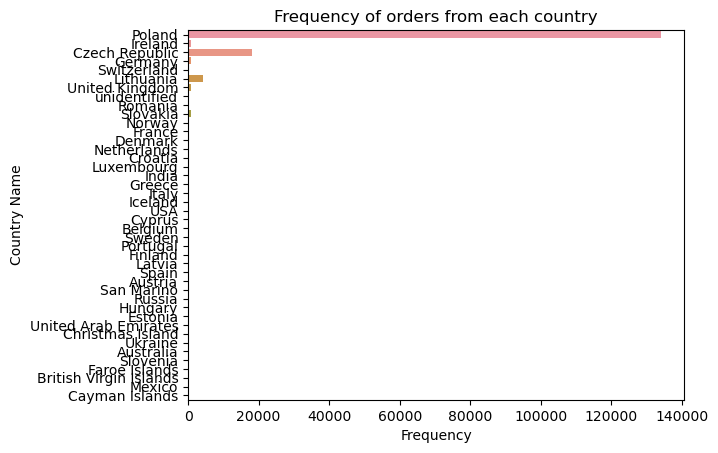

In [ ]:
# Doubt 1: sns.countplot(geodata['country_name'])
sns.countplot(geodata, y = 'country_name')
plt.title(f'Frequency of orders from each country')
plt.xlabel('Frequency')
plt.ylabel('Country Name')
plt.show()

Clearly, countries like Poland, Czech Republic, and Lithuania have highest frequency of orders.<br><br>We shall remove these countries of very high frequency and check the order frequency from other countries.

In [ ]:
database = px.data.gapminder().query('year == 2007')[['country', 'iso_alpha', 'iso_num']]
geodata_en = pd.merge(database, geodata, how='inner', left_on='country', right_on='country_name')
geodata_en.drop(['country_x', 'country_y'], axis=1, inplace=True)
geodata_en = geodata_en.groupby(['country_name', 'iso_alpha', 'iso_num']).sum().reset_index()

In [ ]:
countries_to_remove = ['Poland', 'Czech Republic']
geodata_en = geodata_en[~geodata_en['country_name'].isin(countries_to_remove)]

In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)

fig = px.choropleth(geodata_en,
                    locations="country_name",#"iso_alpha",
                    locationmode="country names",#"ISO-3",
                    geojson = f"{url}/world-countries.json",
                    color="order", title='Countrywise order count'
                   )

fig.show()

Users from Germany, UK, Ireland, Norway, and Romania have placed high amount of orders when compared to the rest of the countries

In [ ]:
geodata = data[['country', 'price']]
geodata['country_name'] = geodata['country'].apply(lambda c: country_map.get(c))
database = px.data.gapminder().query('year == 2007')[['country', 'iso_alpha', 'iso_num']]
geodata_en = pd.merge(database, geodata, how='inner', left_on='country', right_on='country_name')
geodata_en.drop(['country_x', 'country_y'], axis=1, inplace=True)
geodata_en = geodata_en.groupby(['country_name', 'iso_alpha', 'iso_num']).sum().reset_index()
countries_to_remove = ['Poland', 'Czech Republic']
geodata_en = geodata_en[~geodata_en['country_name'].isin(countries_to_remove)]

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)

fig = px.choropleth(geodata_en,
                    locations="country_name",#"iso_alpha",
                    locationmode="country names",#"ISO-3",
                    geojson = f"{url}/world-countries.json",
                    color="price", title='Price contribution from each country'
                   )

fig.show()

Germany, Ireland, UK, France, Sweden, Norway, and Romania have placed high value orders next to Poland & Czech Republic.

### Product Category wise Analysis

In [ ]:
category_map = {
    1:"trousers",
    2:"skirts",
    3:"blouses",
    4:"sale",
}

catdata = data[['category', 'order', 'month']]
catdata['category_name'] = catdata['category'].apply(lambda c: category_map.get(c))

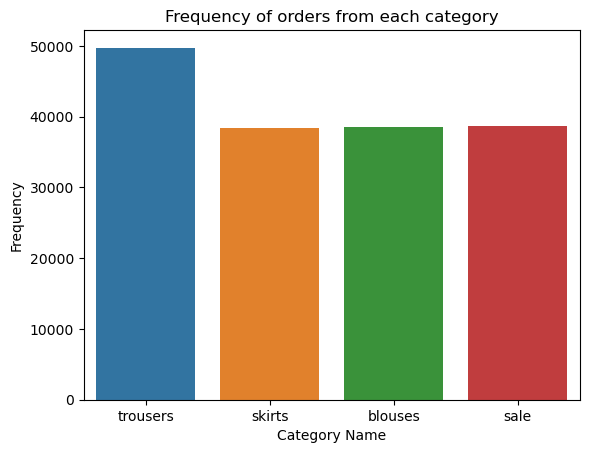

In [ ]:
sns.countplot(x=catdata['category_name'])
plt.title(f'Frequency of orders from each category')
plt.ylabel('Frequency')
plt.xlabel('Category Name')
plt.show()

Clearly within the three months, users have shopped more for trousers, and rest of the product categories are browsed equally!<br><br>Understanding monthly orders from each product category will make us transperant to the categories popular each month.

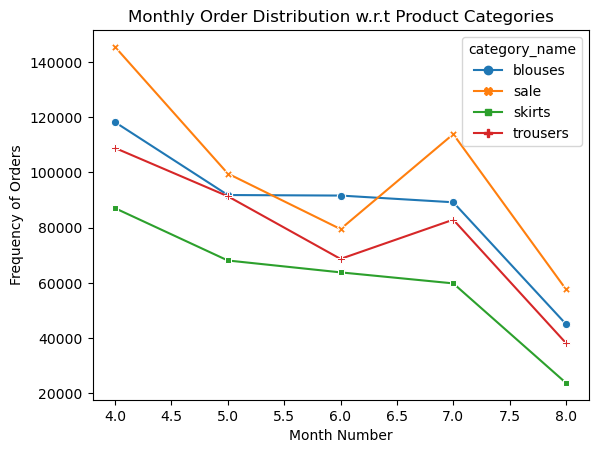

In [ ]:
cat_monthly_orders = catdata.groupby(['month', 'category_name'])['order'].sum().reset_index()
sns.lineplot(data=cat_monthly_orders, x="month", y="order",
             hue="category_name", style="category_name",
             markers=True, dashes=False)
plt.title(f'Monthly Order Distribution w.r.t Product Categories')
plt.xlabel(f'Month Number')
plt.ylabel(f'Frequency of Orders')
plt.show()

Clearly, There seems to be a sale in the months of April & August. Though trousers have higher number of orders collectively, we find blouses have higher number of orders each month. Skirts have relatively less frequency of orders per month.

In [ ]:
catdata = data[['category', 'price', 'month']]
catdata['category_name'] = catdata['category'].apply(lambda c: category_map.get(c))

cat_monthly_orders = catdata.groupby(['month', 'category_name'])['price'].sum().reset_index()
sns.lineplot(data=cat_monthly_orders, x="month", y="price",
             hue="category_name", style="category_name",
             markers=True, dashes=False)
plt.title(f'Monthly Order value (Price) Distribution w.r.t Product Categories')
plt.xlabel(f'Month Number')
plt.ylabel(f'Order value')
plt.show()

Trousers, though ordered less have higher price compared to rest of the categories. It is interesting to see, blouses having higher number of orders yet its price is lower than rest of the categories. This only goes to say blouses were actually priced less and hence more orders were placed. We can make similar explainations for rest of the categories.

#### Bivariate

##### Correlation Analysis:

Pearson's correlation helps in determining whether two attributes share same information or not

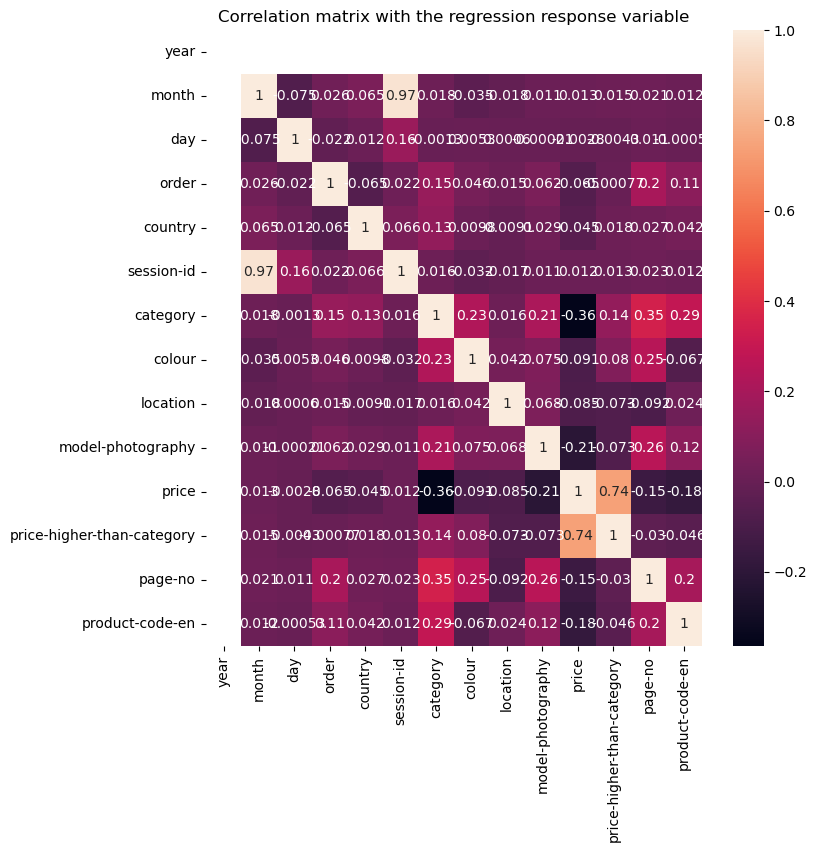

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(regression_data.corr(), annot=True)
plt.title(f'Correlation matrix with the regression response variable')
plt.show()

Observations:
- `year` attribute clearly isn't important.
- `month` strongly correlates with `session-id`, so we can remove one. Session IDs increase in value simply because each new session is a serial ID and hence as months increase, the every new user is alloted a new session ID with increasing order. Hence the correlation.
- `price` has a strong positive correlation with `price-higher-than-category`, hence we keep price and remove `price-higher-than-category`.

#### Regression Analysis

In [ ]:
X = sm.add_constant(regression_data.drop(['year',
                                          'price',
                                          'session-id',
                                          'price-higher-than-category'
                                          ], axis=1))
y = regression_data['price']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3198.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:19:53   Log-Likelihood:            -6.3872e+05
No. Observations:              165464   AIC:                         1.277e+06
Df Residuals:                  165453   BIC:                         1.278e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9276      0.19

Clearly, the attributes - `day`, `order`, `country`, `page-no`, are all having p-value higher than 0.05 (significance level). It means that we fail to reject the null hypothesis that the coefficients of these attributes are zero - thus implying these coefficients are not effective in predicting the price. Let's test this further by using `backward elimination` and checking the R2 score!

In [ ]:
# Model a
X_a = X.drop(['day'], axis=1)
model_a = sm.OLS(y, X_a)
results_a = model_a.fit()

# Model b
X_b = X.drop(['day', 'order'], axis=1)
model_b = sm.OLS(y, X_b)
results_b = model_b.fit()

# Model c
X_c = X.drop(['day', 'order', 'country'], axis=1)
model_c = sm.OLS(y, X_c)
results_c = model_c.fit()

# Model d
X_d = X.drop(['day', 'order', 'country', 'page-no'], axis=1)
model_d = sm.OLS(y, X_d)
results_d = model_d.fit()

In [ ]:
print(f'Model a R2: {results_a.rsquared_adj}')
print(f'Model b R2: {results_b.rsquared_adj}')
print(f'Model c R2: {results_c.rsquared_adj}')
print(f'Model d R2: {results_d.rsquared_adj}')

Model a R2: 0.16191613207257483
Model b R2: 0.16192094310220362
Model c R2: 0.16192426300760443
Model d R2: 0.16191942803013692


#### Hence with backward elemination, we show that the model's performance in capturing the variance is constant even by removing these attributes.

### Cleaned Data

In [ ]:
cleaned_data = data.drop(['year', 'session-id', 'price-category_en', 'day', 'order', 'country', 'page-no'], axis=1)

In [ ]:
cleaned_data.to_parquet('final-ecommerce-clothing-data.gzip', index=False)

In [ ]:
print(f'Number of Final Attributes: {len(cleaned_data.columns)}')

Number of Final Attributes: 9


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_reg = regression_data.drop(['price', 'price-higher-than-category'], axis=1)
y_reg = regression_data['price']

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_reg,y_reg)

RandomForestRegressor()

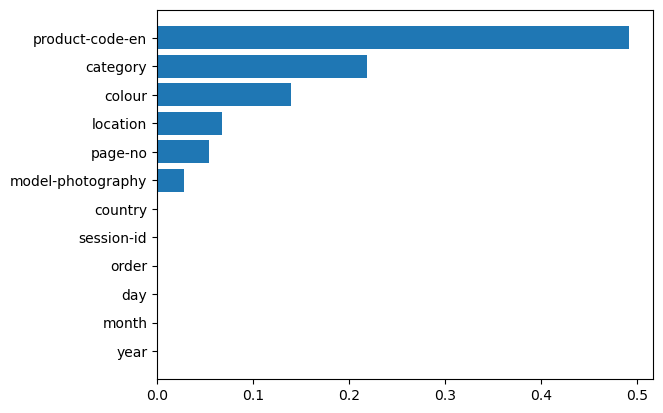

In [ ]:
f_i = list(zip(X_reg.columns, rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

### Get the Data

### Import Packages

In [ ]:
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Data Preparation & Split

In [ ]:
data.drop(['year', 'session-id', 'day', 'order', 'country', 'page-no', 'price-higher-than-category','date'], axis=1, inplace=True)
data.head()

,month,category,colour,location,model-photography,price,product-code-en,price-category_en
0,4,1,1,5,1,28,0,0
1,4,1,1,6,1,33,1,0
2,4,2,10,2,1,52,2,1
3,4,2,6,6,2,38,3,1
4,4,2,4,3,2,52,4,1


In [ ]:
regression_data = data.drop(['price-category_en'], axis=1)

In [ ]:
train, test = train_test_split(regression_data, test_size=0.2)
X_train, y_train =  train.drop(['price'], axis=1), train['price']
X_test, y_test = test.drop(['price'], axis=1), test['price']
print(f'Train samples: {len(train)} & Test samples: {len(test)}')

Train samples: 132371 & Test samples: 33093


### Data Scaling

In [ ]:
class StandardScalar:
    def fit(self, X: np.array) -> None:
        self._mean = np.mean(X, axis=0)
        self._std = np.std(X, axis=0)

    def transform(self, X: np.array) -> np.array:
        return (X - self._mean) / self._std

    def fit_transform(self, X: np.array) -> np.array:
        self.fit(X)
        return self.trasform(X)

In [ ]:
std_scalar = StandardScalar()

In [ ]:
std_scalar.fit(X_train)
X_train_std = std_scalar.transform(X_train)
X_test_std = std_scalar.transform(X_test)

In [ ]:
print(f'Column means: Train - {np.round(np.mean(X_train_std, axis=0).values, 3)} & Test - {np.round(np.mean(X_test_std, axis=0), 3).values}')
print(f'Column standard deviations: Train - {np.std(X_train_std, axis=0).values} & Test - {np.std(X_test_std, axis=0).values}')

Column means: Train - [-0.000000 0.000000 -0.000000 -0.000000 0.000000 0.000000] & Test - [-0.000000 -0.008000 0.001000 -0.004000 -0.005000 0.012000]
Column standard deviations: Train - [1.000000 1.000000 1.000000 1.000000 1.000000 1.000000] & Test - [1.001322 0.999752 1.004983 0.998926 0.997476 1.000466]


In [ ]:
X_train_std

,month,category,colour,location,model-photography,product-code-en
133711,1.065140,-1.225652,-0.053697,0.432154,-0.593477,1.104109
127032,1.065140,-0.351877,-0.999020,1.015737,-0.593477,0.598769
11731,-1.194386,-1.225652,1.364289,-1.318597,1.684986,0.562673
131313,1.065140,-1.225652,1.836951,1.015737,1.684986,0.147572
71023,-0.441210,-0.351877,0.655296,1.015737,-0.593477,-1.314304
...,...,...,...,...,...,...
22888,-1.194386,-0.351877,1.364289,1.015737,1.684986,-0.448007
117626,1.065140,0.521898,1.836951,1.599320,-0.593477,-1.115777
96433,0.311965,0.521898,1.600620,-0.151430,-0.593477,-1.151873
133450,1.065140,0.521898,1.127958,-0.735013,-0.593477,-0.935299


## Model Building

In [ ]:
class NotAnNumpyArrayException(Exception):
      def __str__(self) -> str:
        return '''
          Provided variable is not an Numpy Array. Please only provide numpy arrays as variables
        '''

class SolutionNotImplemented(Exception):
      def __str__(self) -> str:
            return '''
              Requested solution not available. Available solutions are only `iterative` & `analytical`. Please choose correctly.
             '''
class UnstableSolution(Exception):
    matrix_rank: int

    def __str__(self) -> str:
        return f'''
              The Rank of the Matrix is: {self.matrix_rank}. It is not stable. The Matrix has to be Full Rank to compute analytical solution.
             '''

class ProvideCorrectParameters(Exception):
      def __str__(self) -> str:
             return '''
              Provide solution: str, epochs: int, and learning_rate: float correctly for Iterative solution
             '''
class ParameterStoppedUpdating(Exception):
      def __init__(self, weights: np.ndarray, epoch_no: int):
        self.w = weights
        self.e_no = epoch_no

      def __str__(self) -> str:
        return f'''
                  Current weight values: {self.w} at epoch: {self.e_no}\nWeights have stopped updating. Kindly check for numerical overflow / underflow issues.
                '''

In [ ]:
class NumpyBaseRegression:
  _weights = None

  def _add_bias(self, X: np.array) -> np.array:
    self.num_features = X.shape[1] + 1
    return np.column_stack([np.ones(X.shape[0]), X])

  def _get_matrix_rank(self, X: np.array) -> int:
    return np.linalg.matrix_rank(X)

  def _is_fullrank(self, X: np.array) -> None:
    self.fullrank:bool = self._get_matrix_rank(X) == min(X.shape[0], X.shape[1])

  def _is_lowrank(self, X: np.array) -> None:
    self.lowrank:bool = X.shape[0] < X.shape[1]

    def get_weights(self):
        return self._weights

  def _weight_init(self) -> None:
    self._weights = np.random.normal(loc=0, scale=1, size=self.num_features)

  def predict(self, X: np.array, add_bias = False) -> np.array:
    if add_bias:
      X = self._add_bias(X)
    return np.dot(X, self._weights)

  def _get_sse(self, X: np.array, y: np.array) -> float:
    y_hat = self.predict(X)
    return np.sum((y_hat - y)**2)

  def _get_mse(self, X: np.array, y: np.array) -> float:
    return self._get_sse(X, y) / len(X)

  def _get_rmse(self, X: np.array, y: np.array) -> float:
    return np.sqrt(self._get_mse(X, y))

  def _get_r2(self, X: np.array, y: np.array) -> float:
    y_bar = np.mean(y)
    SST = np.sum((y - y_bar)**2)
    SSE = self._get_sse(X, y)
    return 1 - (SSE/SST)

  def _summary(self, X: np.array, y: np.array) -> str:
    mse = self._get_mse(X, y)
    r2 = self._get_r2(X, y)
    summary = f'''Number of Observations: {X.shape[0]}\nNumber of Features: {X.shape[1] - 1}\nMSE: {mse}\nRMSE: {np.sqrt(mse)}\nR2: {r2}\nIntercept: {self._weights[0]}\nCoefficients: {self._weights[1:]}'''

    return summary

## Linear Regression

In [ ]:
@dataclass
class NumpyLinearRegression(NumpyBaseRegression):
  solution: str
  epochs: Union[int, None] = None
  learning_rate: Union[float, None] = None
  epsilon: float = 0.0003

  def _analytical_solution(self, X: np.array, y: np.array) -> None:
    XTX_inv = np.linalg.inv(X.T.dot(X))
    XTy = X.T.dot(y)
    self._weights = np.dot(XTX_inv, XTy)

  def _cost_derivative(self, X: np.array, y: np.array) -> np.array:
    y_hat = self.predict(X)
    return X.T.dot(y_hat - y)

  def _gradient_descent_solution(self, X: np.array, y: np.array) -> None:
    self.errors = []
    prev_errors = float('inf')
    self._weight_init()

    for ep_no in tqdm.tqdm(range(self.epochs), colour='blue'):
      self._weights -= self.learning_rate * self._cost_derivative(X, y)
      if any(np.isnan(self._weights)) or any(np.isinf(self._weights)):
        # check whether the weights are correctly being learnt or not
        raise ParameterStoppedUpdating(self._weights, epoch_no=ep_no)

      loss = self._get_sse(X, y)

      if abs(loss - prev_errors) < self.epsilon:
        print("\nModel Stopped Learning")
        break

      self.errors.append(prev_errors)
      prev_errors = loss

  def fit(self, X: np.array, y: np.array) -> None:

    if isinstance(X, np.ndarray) and isinstance(y, np.ndarray):
      raise NotAnNumpyArrayException()

    X_ = self._add_bias(X)

    if self.solution == 'analytical':
      self._is_fullrank(X_)
      self._is_lowrank(X_)

      if self.fullrank and not self.lowrank:
        self._analytical_solution(X_, y)
        print(self._summary(X_, y))
      else:
        raise UnstableSolution(matrix_rank=self._get_matrix_rank(X_))

    elif self.solution == 'iterative':

      if not self.epochs or not self.learning_rate:
        raise ProvideCorrectParameters()

      self._gradient_descent_solution(X_, y)
      print(self._summary(X_, y))

    else:
      raise SolutionNotImplemented()

## Ridge Linear Regression

In [ ]:
@dataclass
class NumpyRidgeRegression(NumpyBaseRegression):
  solution: str
  lambda_value: float
  epochs: Union[int, None] = None
  learning_rate: Union[float, None] = None
  epsilon: float = 1e-3

  def _analytical_solution(self, X: np.array, y: np.array) -> None:
    a = np.linalg.inv(np.dot(X.T, X) +  self.lambda_value * np.eye(X.shape[1]))
    b = np.dot(X.T, y)
    self._weights = np.dot(a, b)

  def _cost_derivative(self, X: np.array, y: np.array) -> np.array:
    y_hat = self.predict(X)
    return np.dot(X.T, y_hat - y) + self.lambda_value * self._weights

  def _gradient_descent_solution(self, X: np.array, y: np.array) -> np.array:
    self.errors = []
    self._weight_init()
    prev_error = float('inf')

    for ep_no in tqdm.tqdm(range(self.epochs), colour='blue'):
      self._weights -= self.learning_rate * self._cost_derivative(X, y)
      if any(np.isnan(self._weights)) or any(np.isinf(self._weights)):
        # check whether the weights are correctly being learnt or not
        raise ParameterStoppedUpdating(self._weights, epoch_no=ep_no)

      loss = self._get_sse(X, y)

      if abs(loss - prev_error) < self.epsilon:
        print(f'\nModel stopped training')
        break

      self.errors.append(loss)
      prev_error = loss

  def fit(self, X: np.array, y: np.array) -> None:
    if isinstance(X, np.ndarray) and isinstance(y, np.ndarray):
      raise NotAnNumpyArrayException()

    X_ = self._add_bias(X)

    if self.solution == 'analytical':
      self._is_fullrank(X_)
      self._is_lowrank(X_)

      if self.fullrank and not self.lowrank:
        self._analytical_solution(X_, y)
        print(self._summary(X_, y))
      else:
        raise UnstableSolution(matrix_rank=self._get_matrix_rank(X_))

    elif self.solution == 'iterative':

      if not self.epochs or not self.learning_rate:
        raise ProvideCorrectParameters()

      self._gradient_descent_solution(X_, y)
      print(self._summary(X_, y))

    else:
      raise SolutionNotImplemented()

  def _summary(self, X: np.array, y: np.array) -> str:
    mse = self._get_mse(X, y)
    r2 = self._get_r2(X, y)
    summary = f'''Number of Observations: {X.shape[0]}\nNumber of Features: {X.shape[1] - 1}\nLambda parameter: {self.lambda_value}\nMSE: {mse}\nRMSE: {np.sqrt(mse)}\nR2: {r2}\nIntercept: {self._weights[0]}\nCoefficients: {self._weights[1:]}'''

    return summary

## LASSO Linear Regression

In [ ]:
@dataclass
class NumpyLassoRegression(NumpyBaseRegression):
  solution: str
  lambda_value: float
  epochs: Union[int, None] = None
  learning_rate: Union[float, None] = None
  epsilon: float = 1e-3

  def _cost_derivative(self, X: np.array, y: np.array) -> np.array:
    y_hat = self.predict(X)
    return np.dot(X.T, y_hat - y) + self.lambda_value * np.sign(self._weights)

  def _gradient_descent_solution(self, X: np.array, y: np.array) -> np.array:
    self.errors = []
    self._weight_init()
    prev_error = float('inf')

    for ep_no in tqdm.tqdm(range(self.epochs), colour='blue'):
      self._weights -= self.learning_rate * self._cost_derivative(X, y)
      if any(np.isnan(self._weights)) or any(np.isinf(self._weights)):
        # check whether the weights are correctly being learnt or not
        raise ParameterStoppedUpdating(self._weights, epoch_no=ep_no)

      loss = self._get_sse(X, y)

      if abs(loss - prev_error) < self.epsilon:
        print(f'\nModel stopped training')
        break

      self.errors.append(loss)
      prev_error = loss

  def fit(self, X: np.array, y: np.array) -> None:
    if isinstance(X, np.ndarray) and isinstance(y, np.ndarray):
      raise NotAnNumpyArrayException()

    X_ = self._add_bias(X)

    if self.solution == 'analytical':
      self._is_fullrank(X_)
      self._is_lowrank(X_)

      if self.fullrank and not self.lowrank:
        self._analytical_solution(X_, y)
        print(self._summary(X_, y))
      else:
        raise UnstableSolution(matrix_rank=self._get_matrix_rank(X_))

    elif self.solution == 'iterative':

      if not self.epochs or not self.learning_rate:
        raise ProvideCorrectParameters()

      self._gradient_descent_solution(X_, y)
      print(self._summary(X_, y))

    else:
      raise SolutionNotImplemented()

  def _summary(self, X: np.array, y: np.array) -> str:
    mse = self._get_mse(X, y)
    r2 = self._get_r2(X, y)
    summary = f'''Number of Observations: {X.shape[0]}\nNumber of Features: {X.shape[1] - 1}\nLambda parameter: {self.lambda_value}\nMSE: {mse}\nRMSE: {np.sqrt(mse)}\nR2: {r2}\nIntercept: {self._weights[0]}\nCoefficients: {self._weights[1:]}'''

    return summary

## Artificial Neural Networks

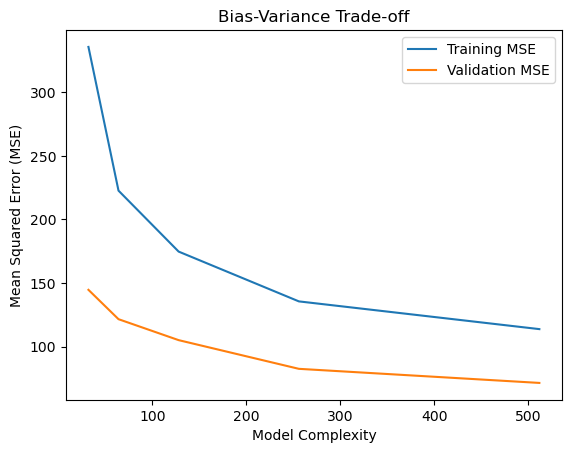

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Define a range of model complexities (e.g., number of neurons)
complexities = [32, 64, 128, 256, 512]

train_errors = []
val_errors = []

# Iterate over different model complexities
for complexity in complexities:
    # Build the model with the current complexity
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(complexity, activation='relu', input_shape=(X_train_std.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(complexity // 2, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_std, y_train, epochs=5, validation_split=0.2, verbose=0)

    # Get training and validation MSE
    train_mse = history.history['loss']
    val_mse = history.history['val_loss']

    # Calculate mean training and validation MSE
    mean_train_mse = np.mean(train_mse)
    mean_val_mse = np.mean(val_mse)

    # Append mean training and validation MSE to lists
    train_errors.append(mean_train_mse)
    val_errors.append(mean_val_mse)



# Plot the bias-variance trade-off graph
plt.plot(complexities, train_errors, label='Training MSE')
plt.plot(complexities, val_errors, label='Validation MSE')
plt.xlabel('Model Complexity')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.show()

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test_std)

# Calculate R^2
r_squared = sklearn.metrics.r2_score(y_test, y_pred)

# Calculate MSE
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Model Name: Neural Network")
print()
# Print the metrics
print("R^2:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)

1035/1035 [==============================] - 3s 3ms/step
Model Name: Neural Network

R^2: 0.625725008435639
MSE: 58.726179009238344
RMSE: 7.663300790732303


## Model Training

In [ ]:
lr = NumpyLinearRegression(solution='analytical')

In [ ]:
lr.fit(X_train_std, y_train)

Number of Observations: 132371
Number of Features: 6
MSE: 131.96701759559093
RMSE: 11.487689828489927
R2: 0.16259975987491015
Intercept: 43.79621669398887
Coefficients: [0.217526 -3.924328 -0.146677 -0.839706 -1.669619 -0.915603]


In [ ]:
lr = NumpyLinearRegression(solution='iterative', epochs=500, learning_rate=1e-5)

In [ ]:
lr.fit(X_train_std, y_train)

 49%|████▊     | 243/500 [00:02<00:02, 113.64it/s]


Model Stopped Learning
Number of Observations: 132371
Number of Features: 6
MSE: 131.9670176213783
RMSE: 11.487689829612318
R2: 0.16259975971127572
Intercept: 43.79621669398886
Coefficients: [0.217529 -3.924242 -0.146634 -0.839687 -1.669556 -0.915541]


In [ ]:
ridge_lr = NumpyRidgeRegression(solution='analytical', lambda_value=10)
ridge_lr.fit(X_train_std, y_train)

Number of Observations: 132371
Number of Features: 6
Lambda parameter: 10
MSE: 131.9670286411003
RMSE: 11.487690309244078
R2: 0.1625996897853349
Intercept: 43.79290834787469
Coefficients: [0.217503 -3.924021 -0.146747 -0.839649 -1.669553 -0.915636]


In [ ]:
ridge_lr = NumpyRidgeRegression(solution='iterative', lambda_value=10, epochs=500, learning_rate=1e-5)
ridge_lr.fit(X_train_std, y_train)

 67%|██████▋   | 333/500 [00:03<00:01, 105.89it/s]


Model stopped training
Number of Observations: 132371
Number of Features: 6
Lambda parameter: 10
MSE: 131.96702864480446
RMSE: 11.4876903094053
R2: 0.16259968976183015
Intercept: 43.7929083478747
Coefficients: [0.217503 -3.924017 -0.146745 -0.839648 -1.669550 -0.915633]


In [ ]:
lasso_lr = NumpyLassoRegression(solution='iterative', lambda_value=10, epochs=500, learning_rate=1e-5)
lasso_lr.fit(X_train_std, y_train)

 32%|███▏      | 161/500 [00:01<00:03, 90.88it/s]


Model stopped training
Number of Observations: 132371
Number of Features: 6
Lambda parameter: 10
MSE: 131.9670574607431
RMSE: 11.487691563614645
R2: 0.16259950690952074
Intercept: 43.79614114874104
Coefficients: [0.217552 -3.920982 -0.144957 -0.838899 -1.667149 -0.913152]


In [ ]:
lr_sk = LinearRegression()
lr_sk.fit(X_train_std, y_train)
print(f'Intercept: {lr_sk.intercept_}\nCoefficients: {lr_sk.coef_}\nR2 score: {lr_sk.score(X_train_std, y_train)}')

Intercept: 43.79621669398887
Coefficients: [0.217526 -3.924328 -0.146677 -0.839706 -1.669619 -0.915603]
R2 score: 0.16259975987491015


In [ ]:
ridge_sk = Ridge(alpha=10)
ridge_sk.fit(X_train_std, y_train)
print(f'Intercept: {ridge_sk.intercept_}\nCoefficients: {ridge_sk.coef_}\nR2 score: {ridge_sk.score(X_train_std, y_train)}')

Intercept: 43.79621669398887
Coefficients: [0.217503 -3.924021 -0.146747 -0.839649 -1.669553 -0.915636]
R2 score: 0.16259975923810233


In [ ]:
lasso_sk = Lasso(alpha=10)
lasso_sk.fit(X_train_std, y_train)
print(f'Intercept: {lasso_sk.intercept_}\nCoefficients: {lasso_sk.coef_}\nR2 score: {lasso_sk.score(X_train_std, y_train)}')

Intercept: 43.79621669398887
Coefficients: [0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000]
R2 score: 0.0


In [ ]:
# # Train the model
# history = model.fit(X_train_std, y_train, epochs=5, validation_split=0.2, verbose=0)

# # Get training and validation MSE
# train_mse = history.history['loss']
# val_mse = history.history['val_loss']

# # Calculate mean training and validation MSE
# mean_train_mse = np.mean(train_mse)
# mean_val_mse = np.mean(val_mse)

# # Append mean training and validation MSE to lists
# train_errors.append(mean_train_mse)
# val_errors.append(mean_val_mse)

In [ ]:
y_preds_lr = lr.predict(X_test_std, add_bias=True)
y_preds_rlr = ridge_lr.predict(X_test_std, add_bias=True)
y_preds_llr = lasso_lr.predict(X_test_std, add_bias=True)
y_preds_lr_sk = lr_sk.predict(X_test_std)
y_preds_rlr_sk = ridge_sk.predict(X_test_std)
y_preds_llr_sk = lasso_sk.predict(X_test_std)

### bias-variance trade-off graph

In [ ]:
# plt.plot(complexities, train_errors, label='Training MSE')
# plt.plot(complexities, val_errors, label='Validation MSE')
# plt.xlabel('Model Complexity')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Bias-Variance Trade-off')
# plt.legend()
# plt.show()

## Model Evaluation

In [ ]:
@dataclass
class RegressionEvaluation:
  y_true: np.array
  y_predictions: np.array
  model_name: str

  def _get_residuals(self) -> None:
    self._residuals = self.y_true - self.y_predictions

  def _get_sse(self) -> None:
    self._sse = np.sum(self._residuals ** 2)

  def _get_mse(self) -> None:
    self._mse = self._sse / self._num_samples

  def _get_rmse(self) -> None:
    self._rmse = np.sqrt(self._mse)

  def _get_r2(self) -> None:
    y_bar = np.mean(self.y_true)
    SST = np.sum((self.y_true - y_bar)**2)
    SSE = self._sse
    self._r2 = 1 - (SSE / SST)

  def results(self) -> str:
    self._num_samples = len(self.y_true)
    self._get_residuals()
    self._get_sse()
    self._get_mse()
    self._get_rmse()
    self._get_r2()

    return f'''Model Name: {self.model_name}\n\nMSE: {self._mse}\nRMSE: {self._rmse}\nR2: {self._r2}\n\n'''

In [ ]:
print(RegressionEvaluation(y_test, y_preds_lr, 'Numpy Linear Regression').results())
print(RegressionEvaluation(y_test, y_preds_rlr, 'Numpy Ridge Linear Regression').results())
print(RegressionEvaluation(y_test, y_preds_llr, 'Numpy Lasso Linear Regression').results())
print(RegressionEvaluation(y_test, y_preds_lr_sk, 'Sk Linear Regression').results())
print(RegressionEvaluation(y_test, y_preds_rlr_sk, 'Sk Ridge Linear Regression').results())
print(RegressionEvaluation(y_test, y_preds_llr_sk, 'Sk Lasso Linear Regression').results())

Model Name: Numpy Linear Regression

MSE: 131.91170707712502
RMSE: 11.485282194057097
R2: 0.1592973715220819


Model Name: Numpy Ridge Linear Regression

MSE: 131.91173516325813
RMSE: 11.48528341675808
R2: 0.15929719252291286


Model Name: Numpy Lasso Linear Regression

MSE: 131.91073673662498
RMSE: 11.485239951199322
R2: 0.15930355571776078


Model Name: Sk Linear Regression

MSE: 131.9117339449506
RMSE: 11.485283363720313
R2: 0.15929720028745742


Model Name: Sk Ridge Linear Regression

MSE: 131.91172551027532
RMSE: 11.485282996525394
R2: 0.1592972540435179


Model Name: Sk Lasso Linear Regression

MSE: 156.9074816848581
RMSE: 12.526271659390838
R2: -6.255723652648371e-06




In [ ]:
from joblib import dump

# best_regressor is your trained regressor
dump(model, 'neural_network_regressor_model.joblib')

['neural_network_regressor_model.joblib']

   # Classification #########

### Get the Data

### Import Packages

In [ ]:
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union
from scipy import stats
import seaborn as sns
from collections import Counter
from dataclasses import dataclass
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import multivariate_normal

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

### Data Preparation & Split

In [ ]:
classification_data.drop([
    'year', 'session-id', 'day', 'order', 'country',
    'page-no', 'price-higher-than-category'
], axis=1, inplace=True)

In [ ]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165464 entries, 0 to 165463
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   month              165464 non-null  int64
 1   category           165464 non-null  int64
 2   colour             165464 non-null  int64
 3   location           165464 non-null  int64
 4   model-photography  165464 non-null  int64
 5   product-code-en    165464 non-null  int32
 6   price-category_en  165464 non-null  int32
dtypes: int32(2), int64(5)
memory usage: 7.6 MB


In [ ]:
train, test = train_test_split(classification_data, test_size=0.2, stratify=classification_data['price-category_en'])
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

X_train, y_train =  train.drop(['price-category_en'], axis=1), train['price-category_en']
X_test, y_test = test.drop(['price-category_en'], axis=1), test['price-category_en']
print(f'Train samples: {len(train)} & Test samples: {len(test)}')

Train samples: 132371 & Test samples: 33093


In [ ]:
# unique_data = classification_data.drop_duplicates()

## Data Preprocessing

In [ ]:
class StandardScalar:
  def fit(self, X: np.array) -> None:
    self._mean = np.mean(X, axis=0)
    self._std = np.std(X, axis=0)

  def transform(self, X: np.array) -> np.array:
    return (X - self._mean) / self._std

  def fit_transform(self, X: np.array) -> np.array:
    self.fit(X)
    return self.trasform(X)

In [ ]:
std_scalar = StandardScalar()

In [ ]:
std_scalar.fit(X_train)
X_train_std = std_scalar.transform(X_train)
X_test_std = std_scalar.transform(X_test)

In [ ]:
print(f'Column means: Train - {np.round(np.mean(X_train_std, axis=0).values, 3)} & Test - {np.round(np.mean(X_test_std, axis=0), 3).values}')
print(f'Column standard deviations: Train - {np.std(X_train_std, axis=0).values} & Test - {np.std(X_test_std, axis=0).values}')

Column means: Train - [-0.000000 0.000000 0.000000 -0.000000 0.000000 0.000000] & Test - [-0.004000 -0.003000 -0.008000 -0.020000 -0.000000 -0.001000]
Column standard deviations: Train - [1.000000 1.000000 1.000000 1.000000 1.000000 1.000000] & Test - [1.003646 1.000088 0.994553 0.991310 0.999932 0.997188]


In [ ]:
assert len(X_train_std) == len(y_train), 'Samples in X train & y train don`t match'
assert len(X_test_std) == len(y_test), 'Samples in X test & y test don`t match'

In [ ]:
class OneHotEncoding:

  def fit(self, y: np.array) -> None:
    self.unique_classes = np.sort(np.unique(y))
    self.num_samples = len(y)

  def transform(self, y: np.array) -> np.array:

    onehots = np.zeros((self.num_samples, len(self.unique_classes)), dtype=int)
    for c in self.unique_classes:
      idx = np.where(y == c)
      onehots[:, c][idx] = 1
    return onehots

  def fit_transform(self, y: np.array) -> np.array:
    self.fit(y)
    return self.transform(y)

In [ ]:
onehot = OneHotEncoding()
onehot.fit(y_train)

In [ ]:
y_train_onehot = onehot.transform(y_train)
y_test_onehot = onehot.transform(y_test)

### Model Building

In [ ]:
class NotAnNumpyArrayException(Exception):
  def __str__(self) -> str:
    return '''
      Provided variable is not an Numpy Array. Please only provide numpy arrays as variables
    '''

class SolutionNotImplemented(Exception):
    def __str__(self) -> str:
        return '''
      Requested solution not available. Available solutions are only `iterative` & `analytical`. Please choose correctly.
     '''
class UnstableSolution(Exception):
    matrix_rank: int

    def __str__(self) -> str:
        return f'''
      The Rank of the Matrix is: {self.matrix_rank}. It is not stable. The Matrix has to be Full Rank to compute analytical solution.
     '''

class ProvideCorrectParameters(Exception):
    def __str__(self) -> str:
        return '''
      Provide solution: str, epochs: int, and learning_rate: float correctly for Iterative solution
     '''

class ParameterStoppedUpdating(Exception):
  def __init__(self, weights: np.ndarray, epoch_no: int):
    self.w = weights
    self.e_no = epoch_no

  def __str__(self) -> str:
    return f'''
      Current weight values: {self.w} at epoch: {self.e_no}\nWeights have stopped updating. Kindly check for numerical overflow / underflow issues.
    '''

class ResponseVariableNotOneHot(Exception):
  def __str__(self) -> str:
    return f'''
      y variable is not one hot encoded. Please preprocess the response variable accordingly to compute softmax scores
    '''

In [ ]:
@dataclass
class NumpyBaseModel:
  _weights = None

  def _add_bias(self, X: np.array) -> np.array:
    self.num_features = X.shape[1] + 1
    return np.column_stack([np.ones(X.shape[0]), X])

  def get_weights(self):
    return self._weights

  def _softmax(self, z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

  def _get_cross_entropy(self, y, prob):
    return - np.sum(y * np.log(prob), axis=1)

  def predict(self, X: np.array, add_bias = False) -> np.array:
    if add_bias:
      X = self._add_bias(X)
    return self._softmax(np.dot(X, self._weights))

  def _get_confusion_matrix(self, y_true: np.array, y_pred: np.array) -> np.array:
    unique_classes = np.sort(np.unique(np.concatenate((y_true, y_pred))))
    self.unique_classes = unique_classes
    cm = np.zeros((len(unique_classes), len(unique_classes)))
    for c in unique_classes:
      indices = np.argwhere(y_true == c).reshape(1, -1)
      true_sample = y_true[indices]
      pred_sample = y_pred[indices]
      uniq, cnts = np.unique(pred_sample, return_counts=True)
      counts = {item : count for item, count in zip(uniq, cnts)}
      for class_idx in counts:
        cm[c][class_idx] = counts[class_idx]
    return cm

  def _compute_precision(self, confusion_matrix: np.array, class_label: int):
    # TP / TP + FP
    tp = confusion_matrix[class_label][class_label]
    deno = np.sum(confusion_matrix[:, class_label])
    if deno == 0:
      return 0
    return tp / deno

  def _compute_recall(self, confusion_matrix: np.array, class_label: int):
    # TP / TP + FN
    tp = confusion_matrix[class_label][class_label]
    deno = np.sum(confusion_matrix[class_label, :])
    if deno == 0:
      return 0
    return tp / deno

  def _get_precision_recall_f1(self, confusion_matrix: np.array):
    matrix = []
    for c in self.unique_classes:
      p = self._compute_precision(confusion_matrix, c)
      r = self._compute_recall(confusion_matrix, c)
      f = 0 if p + r == 0 else 2 * ((p * r) / (p + r))
      s = np.sum(confusion_matrix[c])
      matrix.append([p, r, f, s])

    return np.matrix.round(np.array(matrix), 2).astype(float)

  def _compute_classification_summary(self, X: np.array, y: np.array) -> dict:
    y_true = np.argmax(y, axis=1)
    y_preds = np.argmax(self.predict(X), axis=1)
    confusion_mat = self._get_confusion_matrix(y_true, y_preds)
    p_r_f_mat = self._get_precision_recall_f1(confusion_mat)
    return confusion_mat, p_r_f_mat

  def _get_perclass_summary(self, X: np.array, y: np.array):
    cm, prfs_mat = self._compute_classification_summary(X, y)
    summary = ''
    for c in self.unique_classes:
     class_metrics = prfs_mat[c]
     summary += f'''Prec: {class_metrics[0]} | Recall: {class_metrics[1]} | F1: {class_metrics[2]} | Supp: {class_metrics[3]}\n'''
    return summary

  def _summary(self, X: np.array, y: np.array) -> str:
    return self._get_perclass_summary(X, y)

## SoftMax Regression

In [ ]:
@dataclass(kw_only=True)
class NumpySoftMaxRegression(NumpyBaseModel):
  n_classes: int
  learning_rate: float = 1e-5
  epsilon: float = 1e-3
  epochs: int = 100

  def _weight_init(self) -> None:
    # weights must be n_features x n_classes shape
    self._weights = np.random.normal(
        loc=0,
        scale=1,
        size=(self.num_features, self.n_classes)
    )

  def _cost_function(self, X: np.array, y: np.array) -> np.array:
    softmaxed = self.predict(X)
    cost = - np.mean(self._get_cross_entropy(y, softmaxed))
    return cost

  def _cost_derivative(self, X: np.array, y: np.array) -> np.array:
    softmaxed = self.predict(X)
    diff = softmaxed - y
    grad = np.dot(X.T, diff)
    return grad

  def _gradient_descent_solution(self, X: np.array, y: np.array) -> None:
    self.errors = []
    prev_errors = float('inf')
    self._weight_init()

    for ep_no in tqdm.tqdm(range(self.epochs), colour='blue'):
      self._weights -= self.learning_rate * self._cost_derivative(X, y)

      loss = self._cost_function(X, y)

      if abs(loss - prev_errors) < self.epsilon:
        print(f'\nModel Stopped Learning')
        break

      self.errors.append(prev_errors)
      prev_errors = loss

  def fit(self, X: np.array, y: np.array) -> None:

    if isinstance(X, np.ndarray) and isinstance(y, np.ndarray):
      raise NotAnNumpyArrayException()

    if y.shape[1] != self.n_classes:
      raise ResponseVariableNotOneHot()

    X_ = self._add_bias(X)

    if not self.epochs or not self.learning_rate:
        raise ProvideCorrectParameters()

    self._gradient_descent_solution(X_, y)
    summary = self._summary(X_, y)
    print(summary)

## K-Nearest Neighbours

`NOTE`: Sklearn uses KDTree to do the approximate nearest neigbour search. Hence the Numpy Varient that uses pairwise euclidean distance cannot match or beat SKlearn's performance!

In [ ]:
@dataclass
class NumpyKNNClassifier:
    k: int
    _train_X: Union[None, pd.DataFrame] = None

    def __str__(self) -> str:
        return f'Number of Neighbours: {self.k}\nFitted Samples: {len(self._train_X)}'
    def __repr__(self) -> str:
        return self.__str__()

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        self._train_X = X.values
        self._train_y = y.values
        self._unique_classes = np.unique(self._train_y)
        print(f'Fit Complete')

    def _get_mode(self, mat: np.array) -> np.array:
        return stats.mode(mat, axis=1, keepdims=True).mode

    def predict_proba(self, X: pd.DataFrame) -> np.array:
        dis_mat = euclidean_distances(X.values, self._train_X)
        # Find Top K indices of records from training data, that have smaller distance to test records
        topk_indicies = np.argsort(dis_mat, axis=1)[:, : self.k]
        classes = self._train_y[topk_indicies]
        class_freq = Counter(classes.reshape(1, -1)[0])
        return {c : class_freq.get(c)/self.k for c in class_freq}

    def predict(self, X: pd.DataFrame) -> np.array:
        dis_mat = euclidean_distances(X.values, self._train_X)
        # Find Top K indices of records from training data, that have smaller distance to test records
        topk_indicies = np.argsort(dis_mat, axis=1)[:, : self.k]
        classes = self._train_y[topk_indicies]
        # Compute majority voting using mode
        return self._get_mode(classes).reshape(1, -1)[0]

## Gaussian Naive Bayes

In [ ]:
@dataclass
class NumpyGuassianNaiveBayes:

  def fit(self, X: np.array, y: np.array) -> None:

    self.unique_classes = np.unique(y)
    self.num_unique_classes = len(self.unique_classes)
    self.num_features = X.shape[1]

    self.class_priors = np.zeros((self.num_unique_classes))
    self.mean_mat = np.zeros((self.num_unique_classes, self.num_features))
    self.sigma_mat = np.zeros((self.num_unique_classes, self.num_features, self.num_features))

    for c in self.unique_classes:
      X_samples = X[np.argwhere(y == c)].reshape(-1, self.num_features)

      if len(X_samples) == 0:
        continue

      self.class_priors[c] = len(X_samples)/len(X)
      self.mean_mat[c] = np.mean(X_samples, axis=0)
      self.sigma_mat[c] = np.cov(X_samples, rowvar=False)

  def predict(self, X: np.array) -> np.array:

    posterior_probs = np.zeros((len(X), self.num_unique_classes))
    for c in self.unique_classes:
      posterior_probs[:, c] = self.class_priors[c] * multivariate_normal.pdf(X, self.mean_mat[c], self.sigma_mat[c], allow_singular=True)

    return self.unique_classes[np.argmax(posterior_probs, axis=1)]

## Neural networks

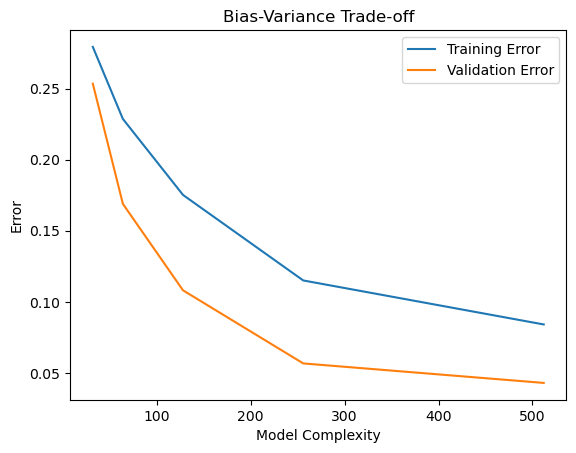

Epoch 1/5
3310/3310 [==============================] - 19s 5ms/step - loss: 0.3833 - accuracy: 0.8317 - val_loss: 0.1669 - val_accuracy: 0.9319
Epoch 2/5
3310/3310 [==============================] - 19s 6ms/step - loss: 0.1871 - accuracy: 0.9156 - val_loss: 0.1019 - val_accuracy: 0.9641
Epoch 3/5
3310/3310 [==============================] - 20s 6ms/step - loss: 0.1379 - accuracy: 0.9360 - val_loss: 0.0820 - val_accuracy: 0.9677
Epoch 4/5
3310/3310 [==============================] - 20s 6ms/step - loss: 0.1138 - accuracy: 0.9475 - val_loss: 0.0677 - val_accuracy: 0.9730
Epoch 5/5
1035/1035 [==============================] - 3s 3ms/step - loss: 0.0537 - accuracy: 0.9780
Final Model Test Loss: 0.05370577052235603, Test Accuracy: 0.9780014157295227


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of model complexities (e.g., number of neurons)
complexities = [32, 64, 128, 256, 512]

train_errors = []
val_errors = []

# Iterate over different model complexities
for complexity in complexities:
    # Build the model with the current complexity
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(complexity, activation='relu', input_shape=(X_train_std.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(complexity // 2, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_std, y_train, epochs=5, validation_split=0.2, verbose=0)

    # Get training and validation accuracy
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Calculate mean training and validation accuracy
    mean_train_accuracy = np.mean(train_accuracy)
    mean_val_accuracy = np.mean(val_accuracy)

    # Append mean training and validation accuracy to lists
    train_errors.append(1 - mean_train_accuracy)  # Error = 1 - Accuracy
    val_errors.append(1 - mean_val_accuracy)      # Error = 1 - Accuracy

# Plot the bias-variance trade-off graph
plt.plot(complexities, train_errors, label='Training Error')
plt.plot(complexities, val_errors, label='Validation Error')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.show()

# Train the final model with the best complexity (optional)
best_complexity = complexities[np.argmin(val_errors)]
final_model = tf.keras.Sequential([
    tf.keras.layers.Dense(best_complexity, activation='relu', input_shape=(X_train_std.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(best_complexity // 2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

final_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

final_history = final_model.fit(X_train_std, y_train, epochs=5, validation_split=0.2)

# Evaluate the final model
final_loss, final_accuracy = final_model.evaluate(X_test_std, y_test)
print(f"Final Model Test Loss: {final_loss}, Test Accuracy: {final_accuracy}")

Epoch 1/50
2896/2896 [==============================] - 22s 7ms/step - loss: 0.0932 - accuracy: 0.9569 - val_loss: 0.0561 - val_accuracy: 0.9814
Epoch 2/50
2896/2896 [==============================] - 23s 8ms/step - loss: 0.0851 - accuracy: 0.9605 - val_loss: 0.0545 - val_accuracy: 0.9759
Epoch 3/50
2896/2896 [==============================] - 23s 8ms/step - loss: 0.0808 - accuracy: 0.9622 - val_loss: 0.0511 - val_accuracy: 0.9700
Epoch 4/50
2896/2896 [==============================] - 24s 8ms/step - loss: 0.0770 - accuracy: 0.9651 - val_loss: 0.0438 - val_accuracy: 0.9815
Epoch 5/50
2896/2896 [==============================] - 21s 7ms/step - loss: 0.0726 - accuracy: 0.9666 - val_loss: 0.0427 - val_accuracy: 0.9767
Epoch 6/50
2896/2896 [==============================] - 19s 7ms/step - loss: 0.0709 - accuracy: 0.9675 - val_loss: 0.0444 - val_accuracy: 0.9837
Epoch 7/50
2896/2896 [==============================] - 19s 7ms/step - loss: 0.0683 - accuracy: 0.9694 - val_loss: 0.0390 - val_ac

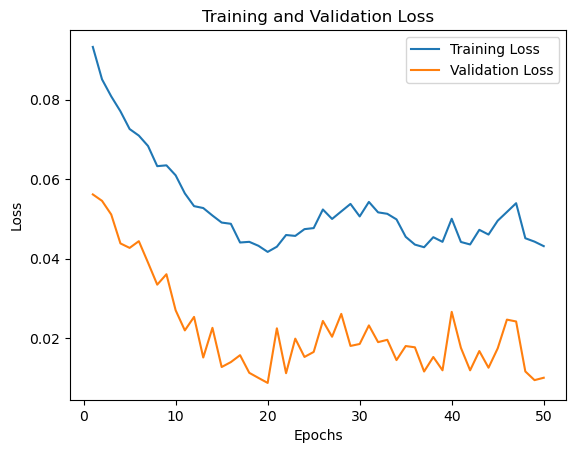

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train_std, y_train, epochs=50, validation_split=0.3)

# Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss over epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
plt.show()

### Model Training

In [ ]:
lr = NumpySoftMaxRegression(n_classes=4, learning_rate=1e-5, epsilon=1e-3, epochs=200)
lr.fit(X_train_std, y_train_onehot)

 10%|█         | 21/200 [00:02<00:20,  8.75it/s]


Model Stopped Learning
Prec: 0.45 | Recall: 0.09 | F1: 0.15 | Supp: 30282.0
Prec: 0.7 | Recall: 0.96 | F1: 0.81 | Supp: 91246.0
Prec: 0.0 | Recall: 0.0 | F1: 0.0 | Supp: 6279.0
Prec: 0.0 | Recall: 0.0 | F1: 0.0 | Supp: 4564.0



####  Finding Best K for KNN Classifier!

##### Its being fit on X_train_std = 1Lakh+ records, it generates a pairwise distance matrix of 1Lakh+  x 1Lakh+ = memory error

In [ ]:
# scores = []
# k_values = list(range(1, 5))

# for k in k_values:
#     print(f'k: {k}')
#     knn = NumpyKNNClassifier(k)
#     knn.fit(X_train_std, y_train)
#     preds = knn.predict(X_test_std)
#     scores.append(f1_score(y_test, preds, average='weighted'))

In [ ]:
# plt.figure(figsize=(5, 3))
# sns.lineplot(x=k_values, y=scores)
# plt.axhline(y=np.median(scores), linestyle='--', label=f'Median', color='blue')
# plt.axhline(y=np.mean(scores), linestyle='-', label='Mean', color='red')
# k_vals = np.array(k_values)
# plt.title(f'Score vs K value: {k_vals[np.flip(np.argsort(scores))]}')
# plt.xlabel(f'K values')
# plt.ylabel(f'F1 Score')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# knn = NumpyKNNClassifier(k=3)
# knn.fit(X_train_std, y_train)
# preds = knn.predict(X_test_std)

In [ ]:
# print(classification_report(y_test, preds))

In [ ]:
gnb = NumpyGuassianNaiveBayes()
gnb.fit(X_train.values, y_train.values)
y_preds = gnb.predict(X_test.values)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.51      0.35      0.42      7570
           1       0.73      0.79      0.76     22812
           2       0.20      0.25      0.22      1570
           3       0.24      0.24      0.24      1141

    accuracy                           0.65     33093
   macro avg       0.42      0.41      0.41     33093
weighted avg       0.64      0.65      0.64     33093



### Model Evaluation:

In [ ]:
@dataclass
class ClassificationEvaluation:
  y_true: np.array
  y_pred: np.array
  model_name: str

  def _get_confusion_matrix(self, y_true: np.array, y_pred: np.array) -> np.array:

    cm = np.zeros((len(self.unique_classes), len(self.unique_classes)))
    for c in self.unique_classes:
      indices = np.argwhere(y_true == c).reshape(1, -1)
      true_sample = y_true[indices]
      pred_sample = y_pred[indices]
      uniq, cnts = np.unique(pred_sample, return_counts=True)
      counts = {item : count for item, count in zip(uniq, cnts)}
      for class_idx in counts:
        cm[c][class_idx] = counts[class_idx]
    return cm

  def _compute_precision(self, confusion_matrix: np.array, class_label: int):
    # TP / TP + FP
    tp = confusion_matrix[class_label][class_label]
    deno = np.sum(confusion_matrix[:, class_label])
    if deno == 0:
      return 0
    return tp / deno

  def _compute_recall(self, confusion_matrix: np.array, class_label: int):
    # TP / TP + FN
    tp = confusion_matrix[class_label][class_label]
    deno = np.sum(confusion_matrix[class_label, :])
    if deno == 0:
      return 0
    return tp / deno

  def _get_precision_recall_f1(self, confusion_matrix: np.array):
    matrix = []
    for c in self.unique_classes:
      p = self._compute_precision(confusion_matrix, c)
      r = self._compute_recall(confusion_matrix, c)
      f = 0 if p + r == 0 else 2 * ((p * r) / (p + r))
      s = np.sum(confusion_matrix[c])
      matrix.append([p, r, f, s])

    return np.matrix.round(np.array(matrix), 2).astype(float)

  def _compute_classification_summary(self) -> dict:
    confusion_mat = self._get_confusion_matrix(self.y_true, self.y_pred)
    p_r_f_mat = self._get_precision_recall_f1(confusion_mat)
    return confusion_mat, p_r_f_mat

  def _get_perclass_summary(self):
    cm, prfs_mat = self._compute_classification_summary()
    summary = ''
    for c in self.unique_classes:
     class_metrics = prfs_mat[c]
     summary += f'''Prec: {class_metrics[0]} | Recall: {class_metrics[1]} | F1: {class_metrics[2]} | Supp: {class_metrics[3]}\n'''
    return summary

  def results(self) -> str:
    self.unique_classes = np.sort(np.unique(np.concatenate((self.y_true, self.y_pred))))
    return self._get_perclass_summary()

In [ ]:
y_preds = np.argmax(lr.predict(X_test_std, add_bias=True), axis=1)

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
clf_eval = ClassificationEvaluation(y_true=y_test.values, y_pred=y_preds, model_name='Softmax Regression')

In [ ]:
print(clf_eval.results())

Prec: 0.48 | Recall: 0.09 | F1: 0.16 | Supp: 7570.0
Prec: 0.7 | Recall: 0.97 | F1: 0.81 | Supp: 22812.0
Prec: 0.0 | Recall: 0.0 | F1: 0.0 | Supp: 1570.0
Prec: 0.0 | Recall: 0.0 | F1: 0.0 | Supp: 1141.0



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
sk_lr = LogisticRegression(multi_class='multinomial', random_state=0).fit(X_train_std, y_train)

In [ ]:
y_hats = sk_lr.predict(X_test_std)
print(classification_report(y_test, y_hats))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.algorithm

'auto'

In [ ]:
y_preds = neigh.predict(X_test_std)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7570
           1       1.00      1.00      1.00     22812
           2       1.00      1.00      1.00      1570
           3       1.00      1.00      1.00      1141

    accuracy                           1.00     33093
   macro avg       1.00      1.00      1.00     33093
weighted avg       1.00      1.00      1.00     33093



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7570
           1       1.00      1.00      1.00     22812
           2       1.00      1.00      1.00      1570
           3       1.00      1.00      1.00      1141

    accuracy                           1.00     33093
   macro avg       1.00      1.00      1.00     33093
weighted avg       1.00      1.00      1.00     33093



# SVM

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import Bounds

class SoftMarginSVM:
    def __init__(self, C):
        self.C = C

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        Xy = X * y[:, np.newaxis]
        GramXY = np.matmul(Xy, Xy.T)

        def ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(G.dot(alpha))

        def derivative(G, alpha):
            return np.ones_like(alpha) - G.dot(alpha)

        alpha = np.ones(X.shape[0])
        bounds_alpha = Bounds(np.zeros(X.shape[0]), np.full(X.shape[0], self.C))

        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a, y),
                        'jac': lambda a: y})

        optimizer = minimize(fun=lambda a: -ld0(GramXY, a),
                             x0=alpha,
                             jac=lambda a: -derivative(GramXY, a),
                             constraints=constraints,
                             bounds=bounds_alpha)

        self.alpha = optimizer.x
        self.w = X.T.dot(self.alpha * y)
        epsilon = 1e-4
        self.support_vectors = X[self.alpha > epsilon]
        self.support_labels = y[self.alpha > epsilon]

        b = np.mean(self.support_labels - np.dot(self.support_vectors, self.w))
        self.intercept = b

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.intercept)


In [ ]:
X_train_stds = X_train_std.values
X_test_stds = X_test_std.values

In [ ]:
# svmsoft = SoftMarginSVM(C=1.0)
# svmsoft.fit(X_train_stds, y_train)
# y_preds_soft = svmsoft.predict(X_test_stds)

In [ ]:
from tqdm import tqdm
@dataclass
class HardMarginSVMSa:
    learning_rate: float
    lambda_: float
    n_iter: int = 500

    def fit(self, X, y):
        if not isinstance(X, np.ndarray):
            X = X.values

        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in tqdm(range(self.n_iter), desc="Training Progress"):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_ * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_ * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * (-y[idx])

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = X.values

        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)


In [ ]:
svm = HardMarginSVMSa(learning_rate=0.1, lambda_=0.01)
svm.fit(X_train_std, y_train)
y_preds_svm = svm.predict(X_test_std)

Training Progress: 100%|██████████| 500/500 [23:45<00:00,  2.85s/it]


In [ ]:
classification_report(y_test, y_preds_svm)

In [ ]:
from joblib import dump
# Assuming best_classifier is your trained regressor
dump(model, 'neural_network_classifier_model.joblib')

['neural_network_classifier_model.joblib']

### Test Data Prepration

In [ ]:
import os
import pandas as pd
import polars as pl
import numpy as np
from pathlib import Path

In [ ]:
projectdir = Path(os.getcwd())
datadir = projectdir.parent / 'Dataset'
test_data = pd.read_csv('test_data.csv', delimiter=';')

In [ ]:
test_data.head(3)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,8,13,3,29,24023,1,A15,14,5,2,33,2,1
1,2008,8,13,4,29,24023,1,A16,1,6,1,33,2,1
2,2008,8,13,5,29,24023,4,P11,4,4,2,38,1,1


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     10 non-null     int64 
 1   month                    10 non-null     int64 
 2   day                      10 non-null     int64 
 3   order                    10 non-null     int64 
 4   country                  10 non-null     int64 
 5   session ID               10 non-null     int64 
 6   page 1 (main category)   10 non-null     int64 
 7   page 2 (clothing model)  10 non-null     object
 8   colour                   10 non-null     int64 
 9   location                 10 non-null     int64 
 10  model photography        10 non-null     int64 
 11  price                    10 non-null     int64 
 12  price 2                  10 non-null     int64 
 13  page                     10 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 1.2+ KB

In [ ]:
test_data.rename(columns={
    'session ID': 'session-id',
    'price 2': 'price-higher-than-category',
    'page 1 (main category)': 'category',
    'page 2 (clothing model)': 'product-code',
    'model photography': 'model-photography',
    'page': 'page-no'
}, inplace=True)

In [ ]:
test_data['price-higher-than-category'] = test_data['price-higher-than-category'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
class LabelEncoder:
    def __init__(self) -> None:
        self.str2idx = {}
        self.idx2str = {}

    def __str__(self) -> str:
        return f'Number of encoded strings: {len(self.str2idx)}'

    def __repr__(self) -> str:
        return self.__str__()

    def fit(self, col: np.array) -> None:
        c = 0
        for strItem in col:
            if strItem not in self.str2idx:
                self.str2idx[strItem] = c
                self.idx2str[c] = strItem
                c += 1

    def transform(self, col: np.array) -> np.array:
        return np.array([self.str2idx[ele] for ele in col])

    def inverse_transform(self, col: np.array) -> np.array:
        return np.array([self.idx2str[ele] for ele in col])

    def fit_transform(self, col: np.array) -> np.array:
        self.fit(col)
        return self.transform(col)

In [ ]:
test_data

,year,month,day,order,country,session-id,category,product-code,colour,location,model-photography,price,price-higher-than-category,page-no
0,2008,8,13,3,29,24023,1,A15,14,5,2,33,0,1
1,2008,8,13,4,29,24023,1,A16,1,6,1,33,0,1
2,2008,8,13,5,29,24023,4,P11,4,4,2,38,1,1
3,2008,8,13,6,29,24023,4,P18,2,6,1,28,0,1
4,2008,8,13,7,29,24023,4,P13,4,5,1,38,1,1
5,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
6,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
7,2008,8,13,1,34,24026,1,A2,3,1,1,43,0,1
8,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1
9,2008,8,13,3,34,24026,2,B2,3,1,2,57,1,1


In [ ]:
product_encoder = LabelEncoder()
test_data['product-code-en'] = product_encoder.fit_transform(test_data['product-code'])

In [ ]:
def price_bucketing(price: int):
    if price in range(0, 26):
        return 'budget'
    elif price in range(26, 36):
        return 'value'
    elif price in range(35, 66):
        return 'average'
    elif price in range(66, 101):
        return 'premium'
    else:
        return None

test_data['price-category'] = test_data['price'].apply(lambda price: price_bucketing(price))

In [ ]:
# price_category_encoder = LabelEncoder()
# test_data['price-category_en'] = price_category_encoder.fit_transform(test_data['price-category'])

In [ ]:
test_data

,year,month,day,order,country,session-id,category,product-code,colour,location,model-photography,price,price-higher-than-category,page-no,product-code-en,price-category
0,2008,8,13,3,29,24023,1,A15,14,5,2,33,0,1,0,value
1,2008,8,13,4,29,24023,1,A16,1,6,1,33,0,1,1,value
2,2008,8,13,5,29,24023,4,P11,4,4,2,38,1,1,2,average
3,2008,8,13,6,29,24023,4,P18,2,6,1,28,0,1,3,value
4,2008,8,13,7,29,24023,4,P13,4,5,1,38,1,1,4,average
5,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1,5,premium
6,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1,6,average
7,2008,8,13,1,34,24026,1,A2,3,1,1,43,0,1,7,average
8,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1,8,average
9,2008,8,13,3,34,24026,2,B2,3,1,2,57,1,1,9,average


In [ ]:
cleaned_test_data = test_data.drop(['year', 'product-code','price-higher-than-category','session-id', 'day', 'order', 'country', 'page-no'], axis=1)

In [ ]:
cleaned_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              10 non-null     int64 
 1   category           10 non-null     int64 
 2   colour             10 non-null     int64 
 3   location           10 non-null     int64 
 4   model-photography  10 non-null     int64 
 5   price              10 non-null     int64 
 6   product-code-en    10 non-null     int32 
 7   price-category     10 non-null     object
dtypes: int32(1), int64(6), object(1)
memory usage: 732.0+ bytes


In [ ]:
cleaned_test_data

,month,category,colour,location,model-photography,price,product-code-en,price-category
0,8,1,14,5,2,33,0,value
1,8,1,1,6,1,33,1,value
2,8,4,4,4,2,38,2,average
3,8,4,2,6,1,28,3,value
4,8,4,4,5,1,38,4,average
5,8,2,2,4,1,67,5,premium
6,8,1,3,4,1,62,6,average
7,8,1,3,1,1,43,7,average
8,8,3,12,1,1,43,8,average
9,8,2,3,1,2,57,9,average


In [ ]:
cleaned_test_data.to_csv("processed_test_data.csv")